## IMPORTING REQUIRED LIBRARIES

In [3]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.tree import DecisionTreeClassifier,plot_tree
 from sklearn.preprocessing import LabelEncoder
 from sklearn.metrics import accuracy_score
 from sklearn.metrics import recall_score
 from sklearn.metrics import precision_score,f1_score
 from sklearn.metrics import confusion_matrix,classification_report
 from sklearn.preprocessing import StandardScaler
 from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV,cross_val_predict
 from sklearn.metrics import roc_auc_score,roc_curve

## LOADING DATASET

In [6]:
df=pd.read_csv('/content/city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [7]:
df.shape

(29531, 16)

In [8]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [10]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


## REFINING DATASET

In [11]:
d=df.drop(['City', 'Date'],axis=1)
d.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [12]:
d=d.dropna(subset=['AQI_Bucket'])
d['AQI_Bucket'].unique()

array(['Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory', 'Good'],
      dtype=object)

In [13]:
d['PM2.5'].fillna((d['PM2.5'].median()), inplace = True)
d['PM10'].fillna((d['PM10'].median()), inplace = True)
d['NO'].fillna((d['NO'].median()), inplace = True)
d['NO2'].fillna((d['NO2'].median()), inplace = True)
d['NOx'].fillna((d['NOx'].median()), inplace = True)
d['NH3'].fillna((d['NH3'].median()), inplace = True)
d['CO'].fillna((d['CO'].median()), inplace = True)
d['SO2'].fillna((d['SO2'].median()), inplace = True)
d['O3'].fillna((d['O3'].median()), inplace = True)
d['Benzene'].fillna((d['Benzene'].median()), inplace = True)
d['Toluene'].fillna((d['Toluene'].median()), inplace = True)
d['Xylene'].fillna((d['Xylene'].median()), inplace = True)
d['AQI'].fillna((d['AQI'].median()), inplace = True)
d['AQI_Bucket']=d['AQI_Bucket'].map({ 'Severe':0,'Poor':1, 'Very Poor':2, 'Moderate':3, 'Satisfactory':4, 'Good':5})
d['AQI_Bucket']

<ipython-input-13-0e150b1fd81f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d['PM2.5'].fillna((d['PM2.5'].median()), inplace = True)
<ipython-input-13-0e150b1fd81f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,AQI_Bucket
28,1
29,2
30,0
31,0
32,0
...,...
29526,5
29527,4
29528,4
29529,4


In [14]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       24850 non-null  float64
 1   PM10        24850 non-null  float64
 2   NO          24850 non-null  float64
 3   NO2         24850 non-null  float64
 4   NOx         24850 non-null  float64
 5   NH3         24850 non-null  float64
 6   CO          24850 non-null  float64
 7   SO2         24850 non-null  float64
 8   O3          24850 non-null  float64
 9   Benzene     24850 non-null  float64
 10  Toluene     24850 non-null  float64
 11  Xylene      24850 non-null  float64
 12  AQI         24850 non-null  float64
 13  AQI_Bucket  24850 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 2.8 MB


In [15]:
d['AQI_Bucket'].unique()

array([1, 2, 0, 3, 4, 5])

In [16]:
d.isnull().sum()

,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0
Benzene,0


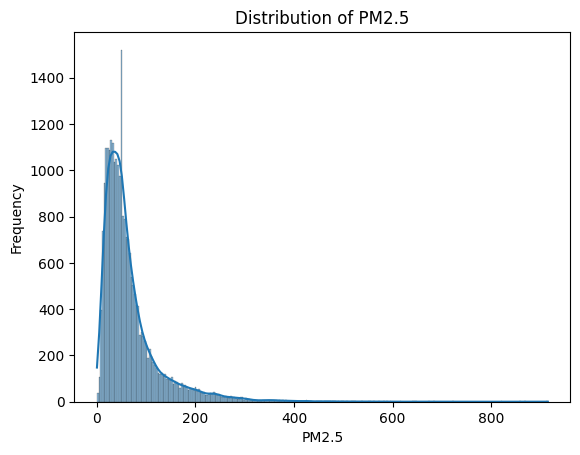

In [17]:
sns.histplot(d['PM2.5'].dropna(), kde=True)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()

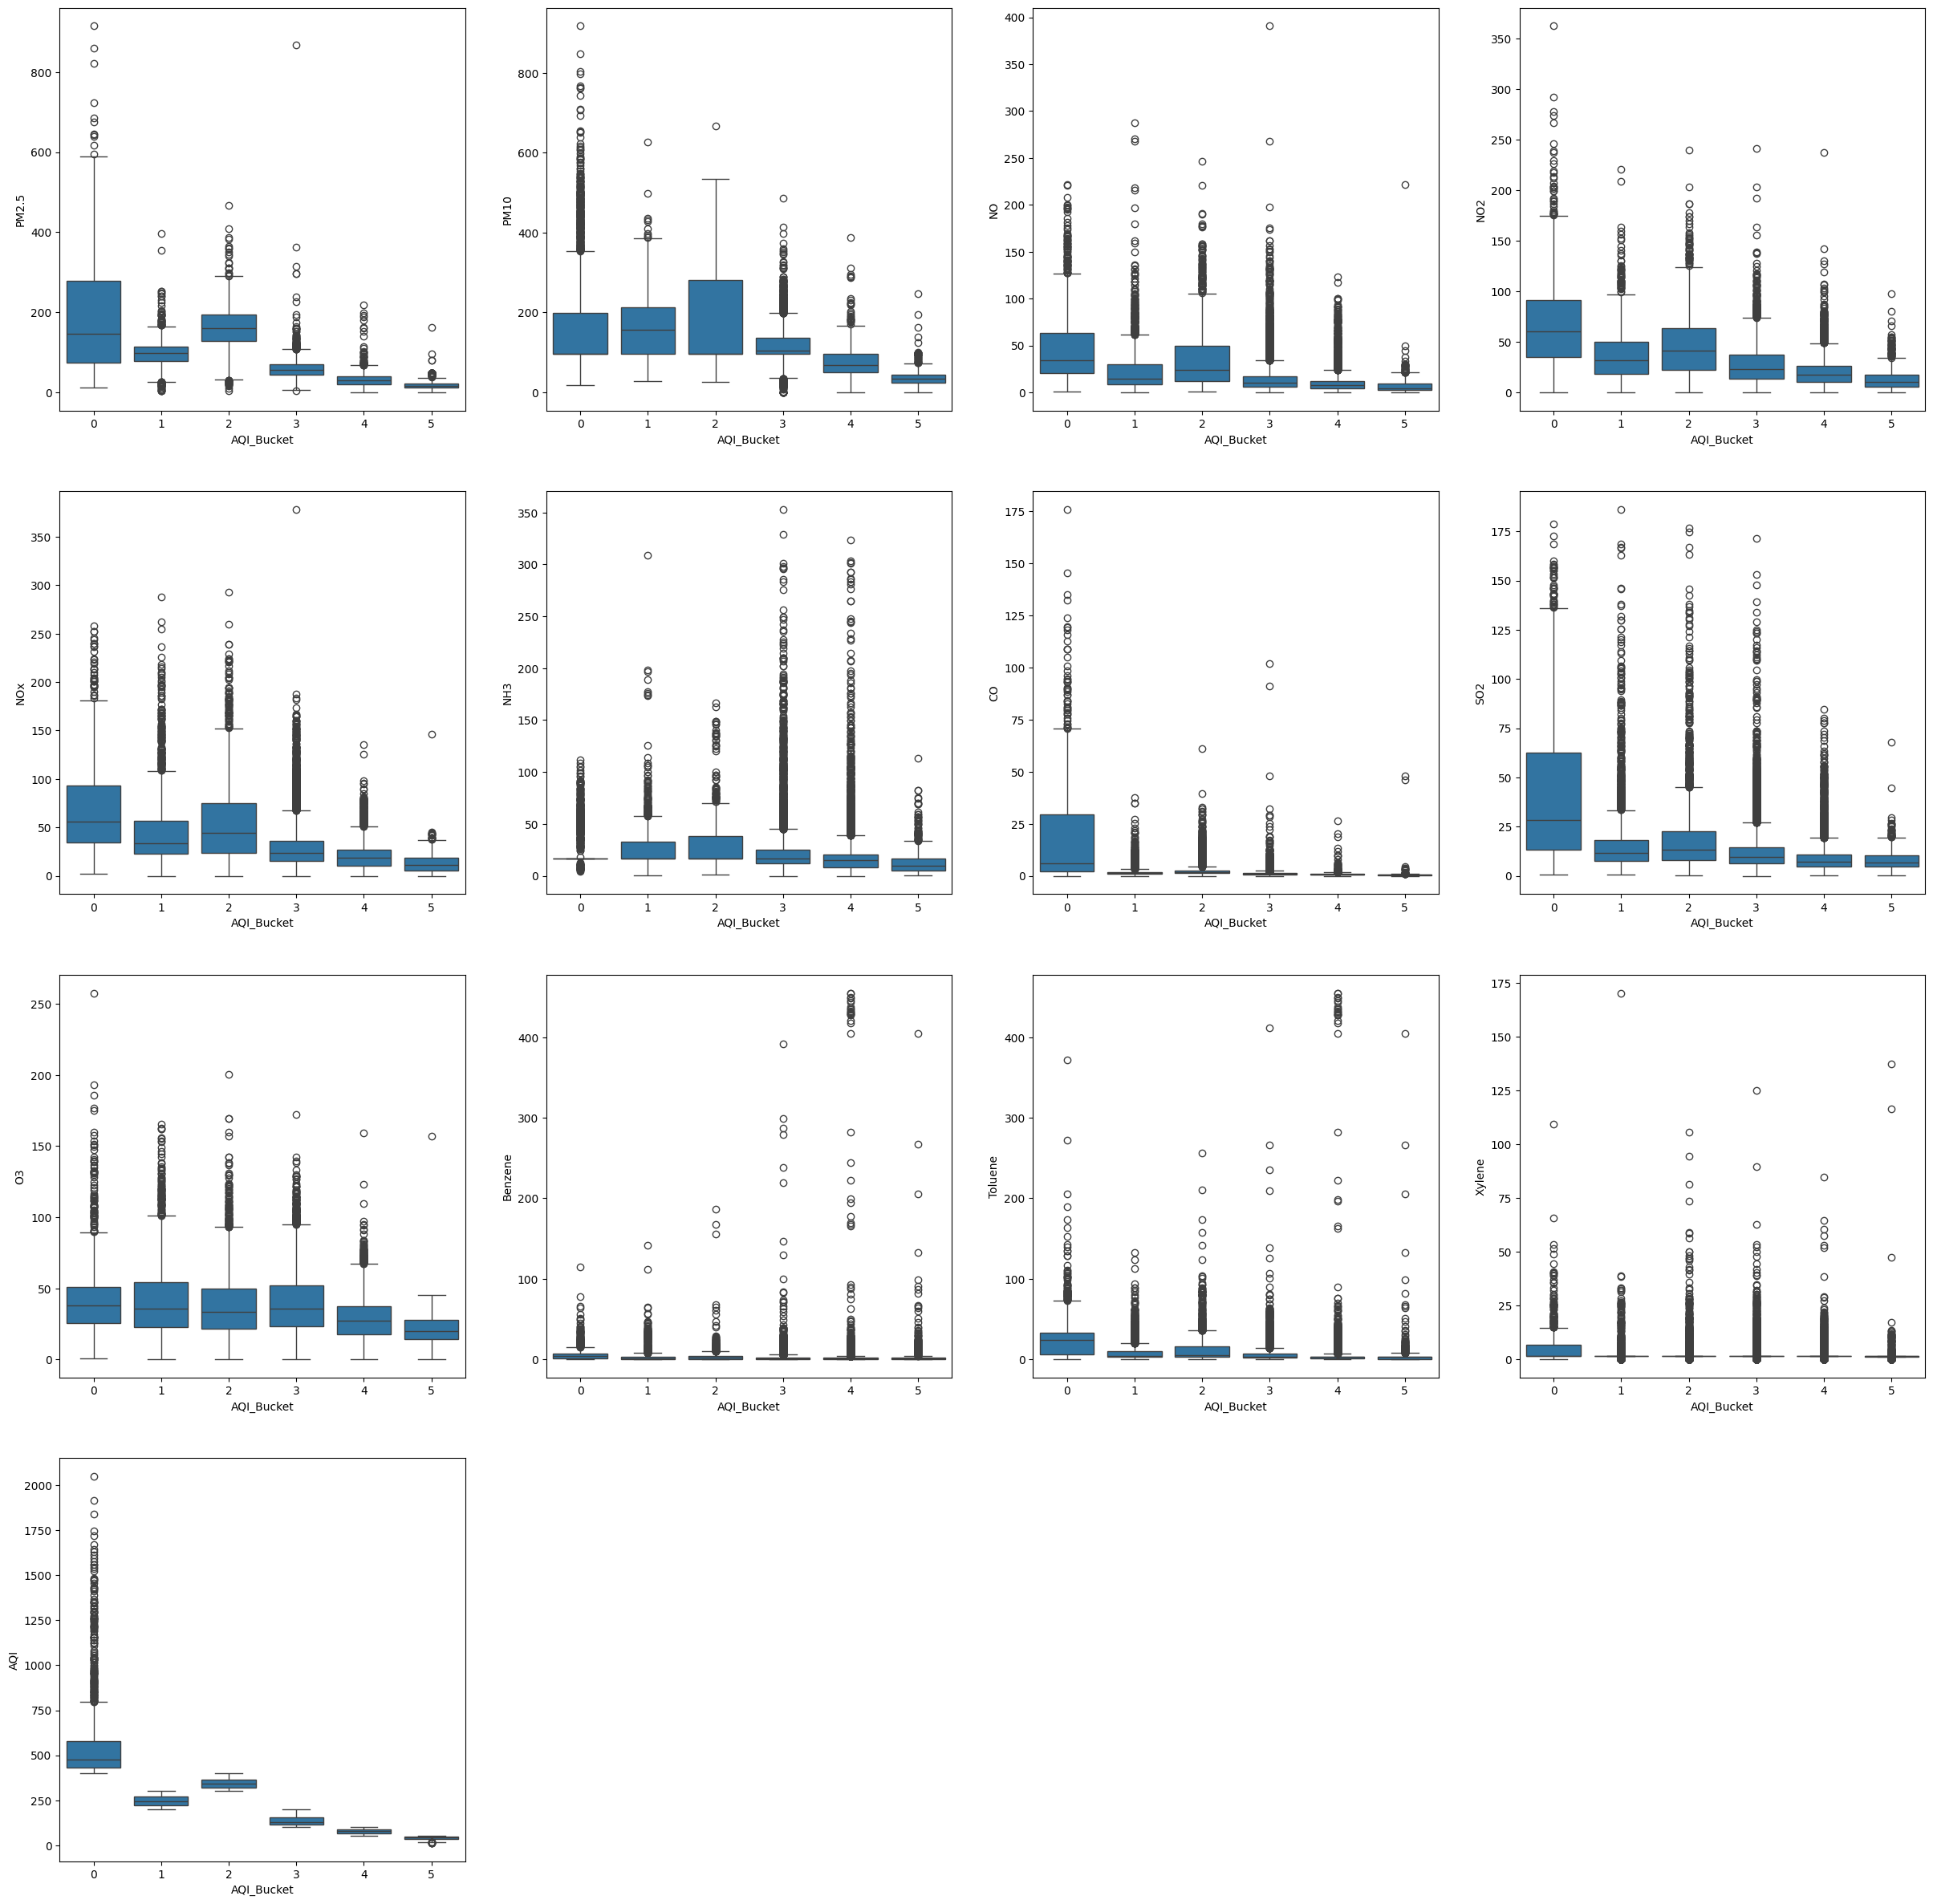

In [18]:
features = list(d.drop(['AQI_Bucket'], axis=1).columns)
target = ['AQI Bucket']
plt.figure(figsize=(30,30))
for i in features:
  c = features.index(i) + 1
  plt.subplot(4,4,c)
  sns.boxplot(y=d[i].values, x=d['AQI_Bucket']).set(ylabel=i)

In [19]:
num_cols=[col for col in d.columns if d[col].dtypes in ["int",'float']]
num_cols

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI',
 'AQI_Bucket']

In [20]:
def outlier_thresholds(dataframe,variable,low_quantile=0.10,up_quantile=0.80):
   quantile_one=dataframe[variable].quantile(low_quantile)
   quantile_three=dataframe[variable].quantile(up_quantile)
   interquantile_range=quantile_three-quantile_one
   up_limit=quantile_three+1.5*interquantile_range
   low_limit=quantile_one-1.5*interquantile_range
   return low_limit,up_limit
def check_outlier(dataframe, col_name):
   low_limit,up_limit=outlier_thresholds(dataframe, col_name)
   if dataframe[(dataframe[col_name]>up_limit) | (dataframe[col_name]<low_limit)].any(axis=None):
       return True
   else:
      return False
for col in num_cols:
   print(col,check_outlier(d,col))

PM2.5 True
PM10 True
NO True
NO2 True
NOx True
NH3 True
CO True
SO2 True
O3 True
Benzene True
Toluene True
Xylene True
AQI True
AQI_Bucket False


In [21]:
def replace_with_thresholds(dataframe, variable):
  low_limit, up_limit=outlier_thresholds(dataframe, variable)
  dataframe.loc[(dataframe[variable]<low_limit),variable]=low_limit
  dataframe.loc[(dataframe[variable]>up_limit),variable]=up_limit
for col in num_cols:
  print(col,replace_with_thresholds(d,col))

PM2.5 None
PM10 None
NO None
NO2 None
NOx None
NH3 None
CO None
SO2 None
O3 None
Benzene None
Toluene None
Xylene None
AQI None
AQI_Bucket None


<ipython-input-21-e2b38b9d5e4d>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable]<low_limit),variable]=low_limit


In [22]:
sns.pairplot(d)

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-23-93c4431cf500>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d[column])
<ipython-input-23-93c4431cf500>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d[column])
<ipython-input-23-93c4431cf500>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in sea

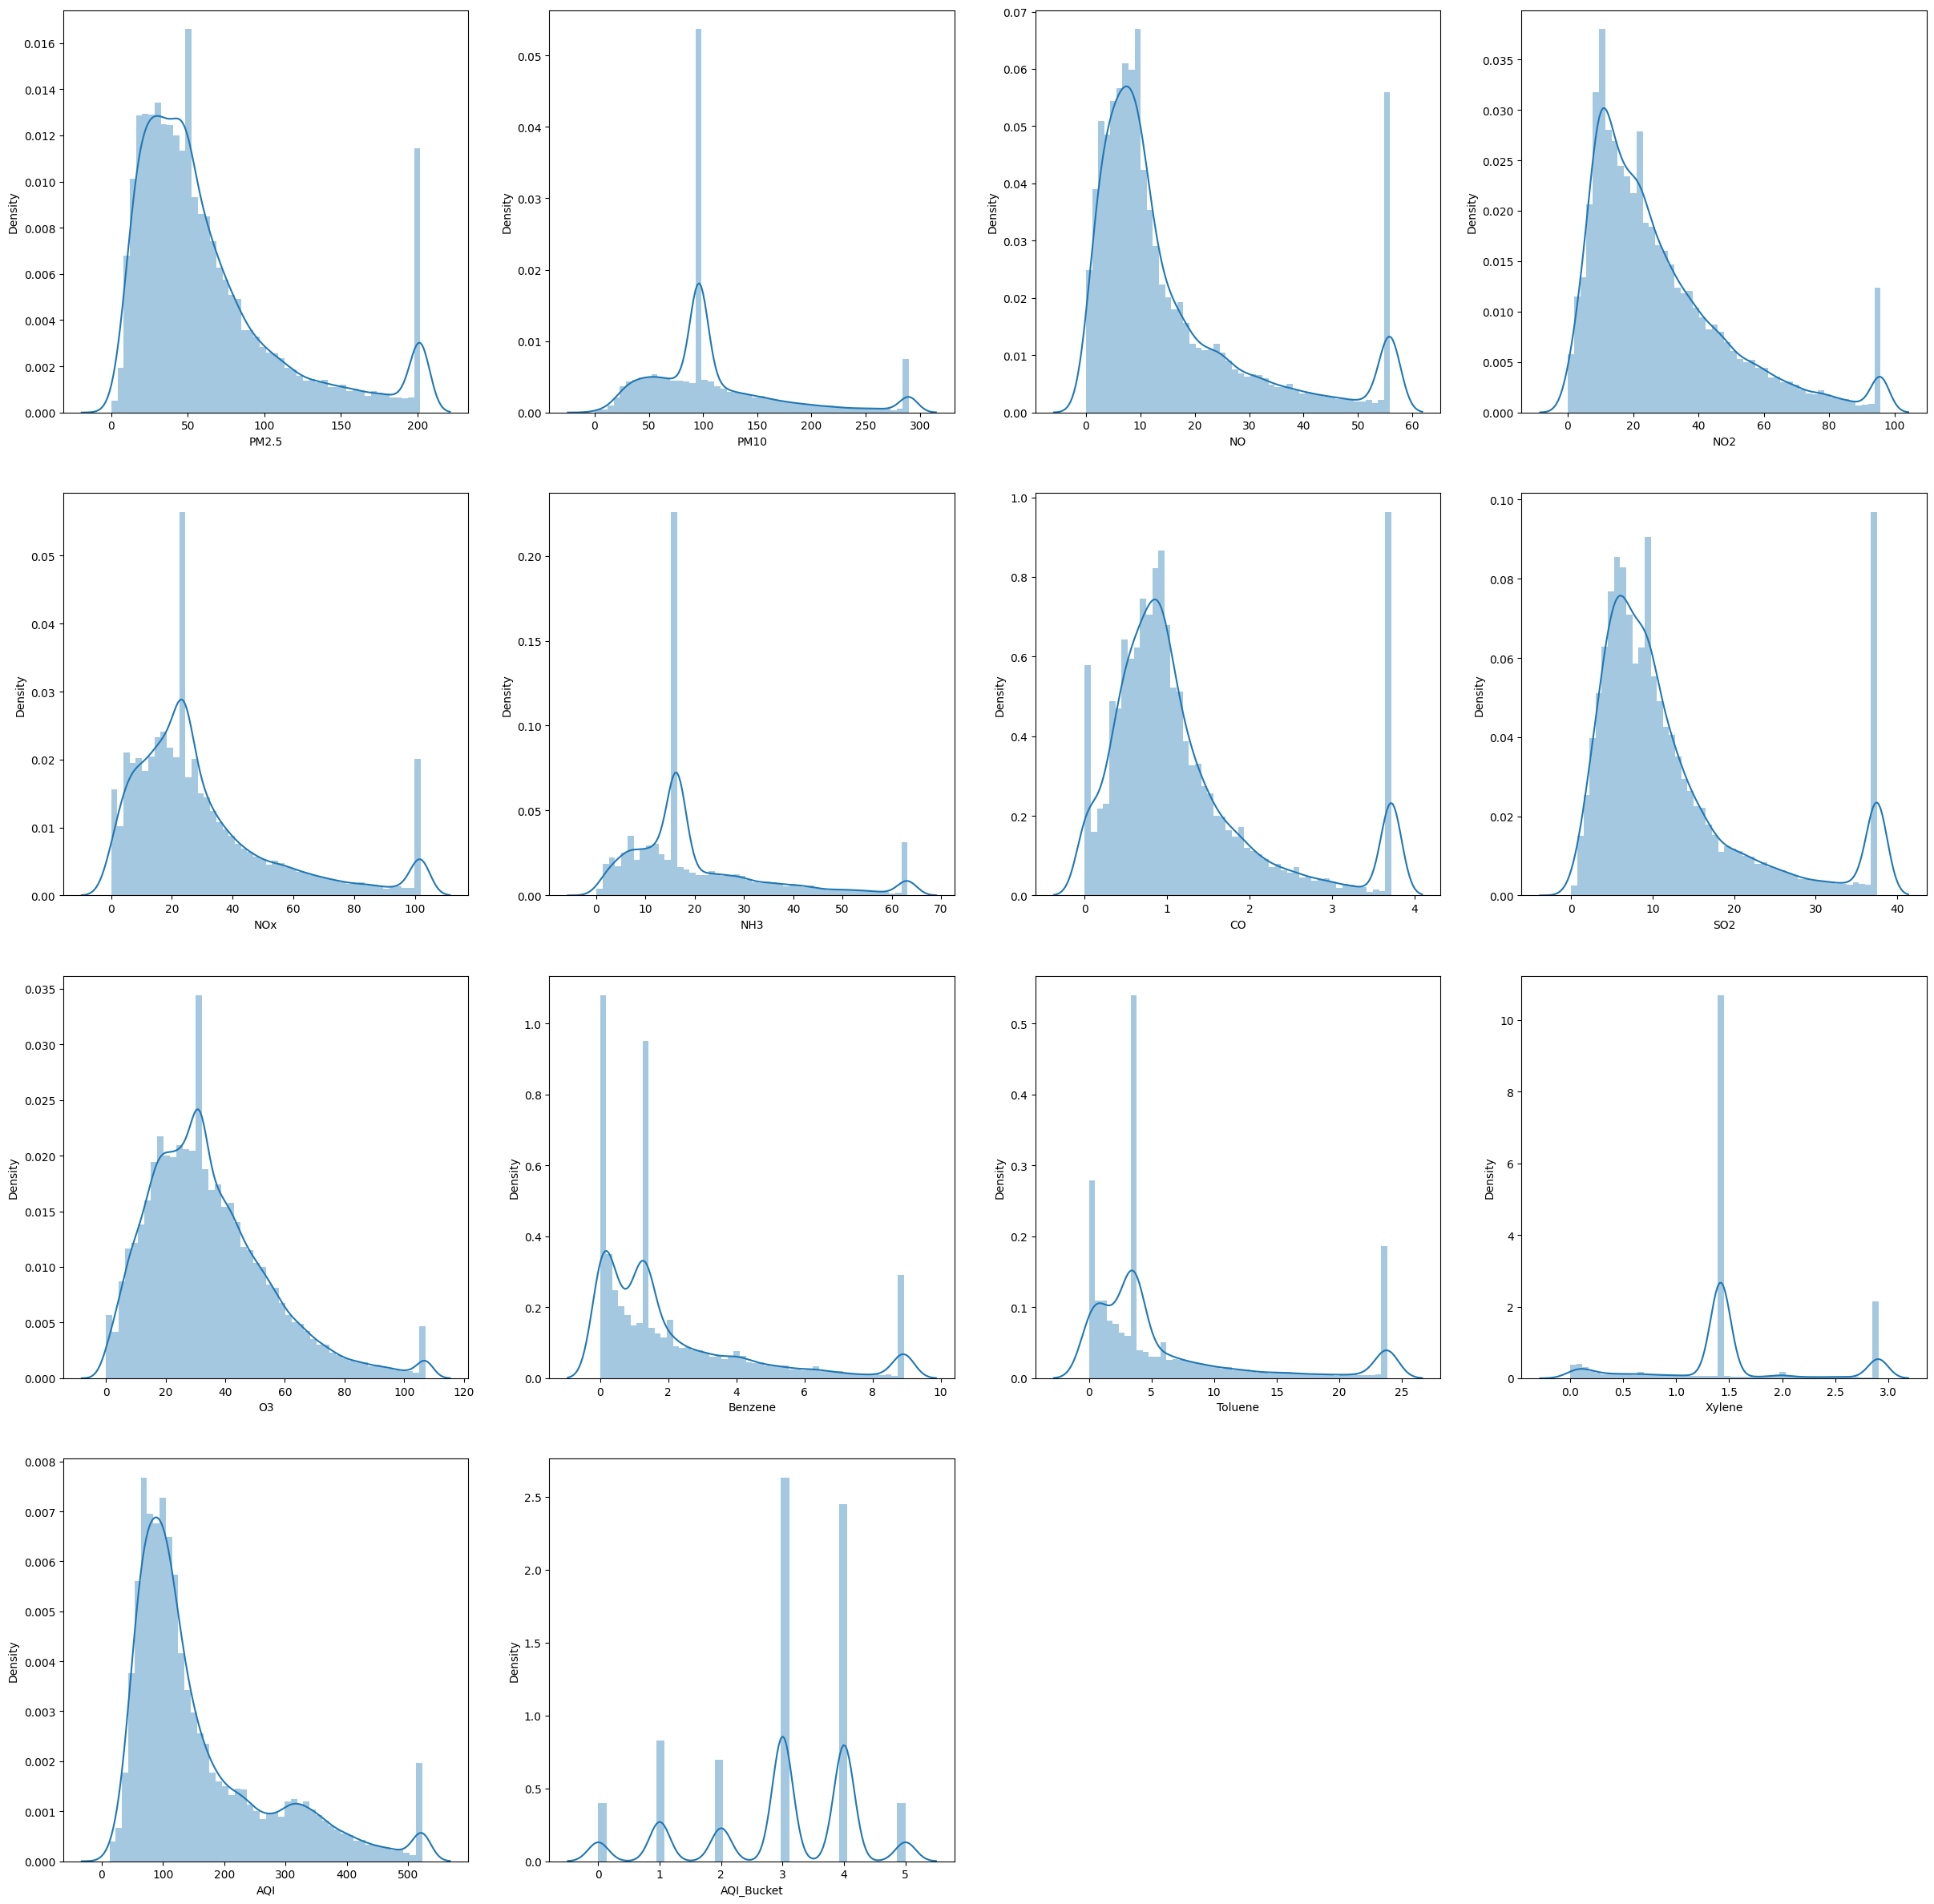

In [23]:
columns=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']
plt.figure(figsize=(30,30),facecolor='white')
plotnumber=1
for column in columns:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(d[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


## SPLITTING DATA INTO TRAINING AND TESTING

In [24]:
x=d.drop(['AQI_Bucket'],axis=1)
y=d.iloc[:,13:14]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((19880, 13), (4970, 13), (19880, 1), (4970, 1))

## STANDARDIZATION

In [25]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.06792547, -0.19929759, -0.76516325, ..., -0.87890629,
        -0.067509  , -0.26944518],
       [-0.70258116, -0.52358378, -0.66643195, ..., -0.71651702,
        -0.067509  , -0.65212381],
       [ 2.82038053, -0.19929759, -0.34740223, ..., -0.76735192,
        -0.067509  ,  2.43539696],
       ...,
       [ 0.87946503,  1.24368844,  0.42095567, ..., -0.51741365,
        -1.94870504,  0.42633415],
       [ 0.227662  ,  1.60280477,  0.073717  , ...,  2.48678786,
        -1.51350297,  0.34805897],
       [-0.30584481, -1.11235643, -0.19829781, ..., -0.66003379,
         2.01935511, -1.00871072]])

##  DECISSION TREE CLASSIFIER

In [26]:
dt=DecisionTreeClassifier()
df=dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)
train_accuracy=df.score(x_train,y_train)
test_accuracy=dt.score(x_test,y_test)
print("training Accuracy: {:.2f}".format(train_accuracy))
print("testing Accuracy: {:.2f}".format(test_accuracy))

training Accuracy: 1.00
testing Accuracy: 1.00


In [27]:
print("Accuracy:",accuracy_score(y_test,y_preddt))
print("confusion matrix:\n",confusion_matrix(y_test,y_preddt))
print("classification report:\n",classification_report(y_test,y_preddt))

Accuracy: 1.0
confusion matrix:
 [[ 258    0    0    0    0    0]
 [   0  539    0    0    0    0]
 [   0    0  439    0    0    0]
 [   0    0    0 1831    0    0]
 [   0    0    0    0 1636    0]
 [   0    0    0    0    0  267]]
classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       258
         1.0       1.00      1.00      1.00       539
         2.0       1.00      1.00      1.00       439
         3.0       1.00      1.00      1.00      1831
         4.0       1.00      1.00      1.00      1636
         5.0       1.00      1.00      1.00       267

    accuracy                           1.00      4970
   macro avg       1.00      1.00      1.00      4970
weighted avg       1.00      1.00      1.00      4970



##  LOGISTIC REGRESSION

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_predlr=lr.predict(x_test)
y_predlr

array([4., 3., 4., ..., 0., 0., 3.])

In [31]:
print("confusion matrix:\n",confusion_matrix(y_test,y_predlr))
print("classification report:\n",classification_report(y_test,y_predlr))
print("Accuracy:",accuracy_score(y_test,y_predlr))
print("Precision:",precision_score(y_test,y_predlr,average=None))
print("Recall:",recall_score(y_test,y_predlr,average=None))
print("F1 score:",f1_score(y_test,y_predlr,average=None))

confusion matrix:
 [[ 251    0    7    0    0    0]
 [   0  515    9   15    0    0]
 [   2    5  432    0    0    0]
 [   0    6    0 1785   40    0]
 [   0    0    0   52 1574   10]
 [   0    0    0    0   66  201]]
classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       258
         1.0       0.98      0.96      0.97       539
         2.0       0.96      0.98      0.97       439
         3.0       0.96      0.97      0.97      1831
         4.0       0.94      0.96      0.95      1636
         5.0       0.95      0.75      0.84       267

    accuracy                           0.96      4970
   macro avg       0.96      0.93      0.95      4970
weighted avg       0.96      0.96      0.96      4970

Accuracy: 0.9573440643863179
Precision: [0.99209486 0.97908745 0.96428571 0.96382289 0.93690476 0.95260664]
Recall: [0.97286822 0.9554731  0.98405467 0.97487712 0.96210269 0.75280899]
F1 score: [0.98238748 0.9671361

##  KNN CLASSIFIER

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [33]:
y_predknn=lr.predict(x_test)
y_predknn

array([4., 3., 4., ..., 0., 0., 3.])

In [34]:
print("confusion matrix:\n",confusion_matrix(y_test,y_predknn))
print("classification report:\n",classification_report(y_test,y_predknn))

confusion matrix:
 [[ 251    0    7    0    0    0]
 [   0  515    9   15    0    0]
 [   2    5  432    0    0    0]
 [   0    6    0 1785   40    0]
 [   0    0    0   52 1574   10]
 [   0    0    0    0   66  201]]
classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       258
         1.0       0.98      0.96      0.97       539
         2.0       0.96      0.98      0.97       439
         3.0       0.96      0.97      0.97      1831
         4.0       0.94      0.96      0.95      1636
         5.0       0.95      0.75      0.84       267

    accuracy                           0.96      4970
   macro avg       0.96      0.93      0.95      4970
weighted avg       0.96      0.96      0.96      4970



In [35]:
print("Accuracy:",accuracy_score(y_test,y_predknn))
print("Precision:",precision_score(y_test,y_predknn,average=None))
print("Recall:",recall_score(y_test,y_predknn,average=None))
print("F1 score:",f1_score(y_test,y_predknn,average=None))

Accuracy: 0.9573440643863179
Precision: [0.99209486 0.97908745 0.96428571 0.96382289 0.93690476 0.95260664]
Recall: [0.97286822 0.9554731  0.98405467 0.97487712 0.96210269 0.75280899]
F1 score: [0.98238748 0.96713615 0.9740699  0.96931849 0.94933655 0.84100418]


## NAIVE BAYES CLASSIFIER

In [36]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [37]:
y_prednb=lr.predict(x_test)
y_prednb

array([4., 3., 4., ..., 0., 0., 3.])

In [38]:
print("confusion matrix:\n",confusion_matrix(y_test,y_prednb))
print("classification report:\n",classification_report(y_test,y_prednb))
print("Accuracy:",accuracy_score(y_test,y_prednb))
print("Precision:",precision_score(y_test,y_prednb,average=None))
print("Recall:",recall_score(y_test,y_prednb,average=None))
print("F1 score:",f1_score(y_test,y_prednb,average=None))

confusion matrix:
 [[ 251    0    7    0    0    0]
 [   0  515    9   15    0    0]
 [   2    5  432    0    0    0]
 [   0    6    0 1785   40    0]
 [   0    0    0   52 1574   10]
 [   0    0    0    0   66  201]]
classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       258
         1.0       0.98      0.96      0.97       539
         2.0       0.96      0.98      0.97       439
         3.0       0.96      0.97      0.97      1831
         4.0       0.94      0.96      0.95      1636
         5.0       0.95      0.75      0.84       267

    accuracy                           0.96      4970
   macro avg       0.96      0.93      0.95      4970
weighted avg       0.96      0.96      0.96      4970

Accuracy: 0.9573440643863179
Precision: [0.99209486 0.97908745 0.96428571 0.96382289 0.93690476 0.95260664]
Recall: [0.97286822 0.9554731  0.98405467 0.97487712 0.96210269 0.75280899]
F1 score: [0.98238748 0.9671361

##  ENSEMBLING LEARNING

### RANDOM FOREST CLASSIFIER

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=5,min_samples_leaf=4)
y_predrf=lr.predict(x_test)
y_predrf

array([4., 3., 4., ..., 0., 0., 3.])

In [40]:
print("confusion matrix:\n",confusion_matrix(y_test,y_predrf))
print("classification report:\n",classification_report(y_test,y_predrf))

confusion matrix:
 [[ 251    0    7    0    0    0]
 [   0  515    9   15    0    0]
 [   2    5  432    0    0    0]
 [   0    6    0 1785   40    0]
 [   0    0    0   52 1574   10]
 [   0    0    0    0   66  201]]
classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       258
         1.0       0.98      0.96      0.97       539
         2.0       0.96      0.98      0.97       439
         3.0       0.96      0.97      0.97      1831
         4.0       0.94      0.96      0.95      1636
         5.0       0.95      0.75      0.84       267

    accuracy                           0.96      4970
   macro avg       0.96      0.93      0.95      4970
weighted avg       0.96      0.96      0.96      4970



In [41]:
print("Accuracy:",accuracy_score(y_test,y_predrf))
print("Precision:",precision_score(y_test,y_predrf,average=None))
print("Recall:",recall_score(y_test,y_predrf,average=None))
print("F1 score:",f1_score(y_test,y_predrf,average=None))

Accuracy: 0.9573440643863179
Precision: [0.99209486 0.97908745 0.96428571 0.96382289 0.93690476 0.95260664]
Recall: [0.97286822 0.9554731  0.98405467 0.97487712 0.96210269 0.75280899]
F1 score: [0.98238748 0.96713615 0.9740699  0.96931849 0.94933655 0.84100418]


### ADA BOOSTING

In [47]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100,random_state=2)
abc.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=100, random_state=2)

In [48]:
y_predabc=lr.predict(x_test)
y_predabc

array([4., 3., 4., ..., 0., 0., 3.])

In [49]:
print("confusion matrix:\n",confusion_matrix(y_test,y_predabc))
print("classification report:\n",classification_report(y_test,y_predabc))

confusion matrix:
 [[ 251    0    7    0    0    0]
 [   0  515    9   15    0    0]
 [   2    5  432    0    0    0]
 [   0    6    0 1785   40    0]
 [   0    0    0   52 1574   10]
 [   0    0    0    0   66  201]]
classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       258
         1.0       0.98      0.96      0.97       539
         2.0       0.96      0.98      0.97       439
         3.0       0.96      0.97      0.97      1831
         4.0       0.94      0.96      0.95      1636
         5.0       0.95      0.75      0.84       267

    accuracy                           0.96      4970
   macro avg       0.96      0.93      0.95      4970
weighted avg       0.96      0.96      0.96      4970



In [50]:
print("Accuracy:",accuracy_score(y_test,y_predabc))
print("Precision:",precision_score(y_test,y_predabc,average=None))
print("Recall:",recall_score(y_test,y_predabc,average=None))
print("F1 score:",f1_score(y_test,y_predabc,average=None))

Accuracy: 0.9573440643863179
Precision: [0.99209486 0.97908745 0.96428571 0.96382289 0.93690476 0.95260664]
Recall: [0.97286822 0.9554731  0.98405467 0.97487712 0.96210269 0.75280899]
F1 score: [0.98238748 0.96713615 0.9740699  0.96931849 0.94933655 0.84100418]


### GRADIENT BOOSTING

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=1)
gbc.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=1)

In [44]:
y_predgbc=lr.predict(x_test)
y_predgbc

array([4., 3., 4., ..., 0., 0., 3.])

In [45]:
print("confusion matrix:\n",confusion_matrix(y_test,y_predgbc))
print("classification report:\n",classification_report(y_test,y_predgbc))

confusion matrix:
 [[ 251    0    7    0    0    0]
 [   0  515    9   15    0    0]
 [   2    5  432    0    0    0]
 [   0    6    0 1785   40    0]
 [   0    0    0   52 1574   10]
 [   0    0    0    0   66  201]]
classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       258
         1.0       0.98      0.96      0.97       539
         2.0       0.96      0.98      0.97       439
         3.0       0.96      0.97      0.97      1831
         4.0       0.94      0.96      0.95      1636
         5.0       0.95      0.75      0.84       267

    accuracy                           0.96      4970
   macro avg       0.96      0.93      0.95      4970
weighted avg       0.96      0.96      0.96      4970



In [46]:
print("Accuracy:",accuracy_score(y_test,y_predgbc))
print("Precision:",precision_score(y_test,y_predgbc,average=None))
print("Recall:",recall_score(y_test,y_predgbc,average=None))
print("F1 score:",f1_score(y_test,y_predgbc,average=None))

Accuracy: 0.9573440643863179
Precision: [0.99209486 0.97908745 0.96428571 0.96382289 0.93690476 0.95260664]
Recall: [0.97286822 0.9554731  0.98405467 0.97487712 0.96210269 0.75280899]
F1 score: [0.98238748 0.96713615 0.9740699  0.96931849 0.94933655 0.84100418]
